TP6 -Algorithmes pour la résolution de problèmes de moindres carrés
====================================

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.io

1. Problèmes de moindres carrés linéaires
------------------------------------------

Soient $(x_i,y_i)$, $i=1,\dots,n$ un nuage donné de points. On cherche la relation existant entre les valeurs $x_i$ et les valeurs $y_i$. Pour illustrer cet exercice on introduit deux jeux de données:
* Jeu A. On possède $6$ spécimens fossiles d'un animal disparu et ces spécimens sont de tailles différentes. On estime que si ces animaux appartiennent à la même espèce, il doit exister une relation linéaire entre la longueur de deux de leurs os: le fémur et l'humérus. Voici les données de ces longueurs en cm pour les $5$ spécimens possédant ces deux os intacts:

In [2]:
# Longueur du fémur
xA = np.array([38,56,59,64,74])
# Longueur de l'humérus
yA = np.array([41,63,70,72,84])

* Jeu B. On cherche une relation entre les données suivantes:

In [3]:
xB = np.array([0,1,2,3,4,5,6])
yB = np.array([-5.3,0.4,2.6,4.3,3,0.5,-5.4])

### A. Régression linéaire

Supposons pour commencer qu'il existe une relation linéaire entre nos données: 
$$y=ax+b.$$
1. Montrer que le problème ci-dessus s'écrit sous la forme d'un pb d'un problème de moindres carrés linéaires:
$$(P) \qquad\displaystyle \min_{(a,b)\in\mathbb{R}} \frac{1}{2}\|A\left(\begin{array}{c}
a\\ b
\end{array}\right)-y\|_2^2.$$

2. Montrer que le problème $(P)$ admet un unique point de minimum global $(\bar a,\bar b)$ sur $\mathbb{R}^2$ et caractériser ce point (*On pourra montrer que la solution $(a,b)$ est solution d'un système linéaire que l'on explicitera*).

3. Programmer la résolution numérique de ce problème pour les jeux $A$ et $B$. Commentez.

In [5]:
def regressionlineaire(x,y):
    # PRENDRE LA METHODE TD4 EX6
    A = np.zeros((len(x),2))
    # On construit la matrice A
    A[:,0] = x
    A[:,1] = 1
    # On trouve sa transposée
    At = np.transpose(A)
    # On calcule At•A et At•y pour résoudre l'équation At•A•(a,b) = At•y
    AtA = np.dot(At, A)
    Aty = np.dot(At, y)
    # On résoud l'équation AtA(a,b)=Aty
    (a,b) = np.linalg.solve(AtA,Aty)
    return a,b
print(regressionlineaire(xA,yA))

(1.19690011481056, -3.659586681974594)


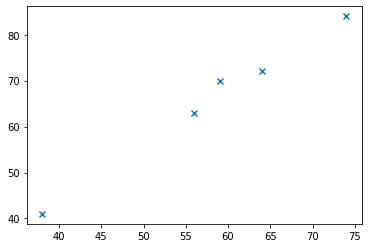

In [10]:
#Affichage des points de mesure
x=xA
y=yA
#x=xB
#y=yB
plt.scatter(x,y,marker='x')
plt.show()

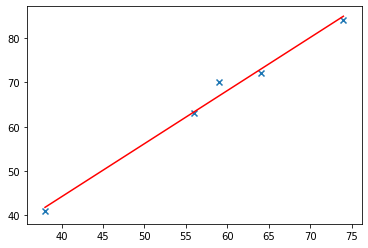

In [11]:
[a,b]=regressionlineaire(x,y)
n=len(x)
xx =np.arange(x[0],x[n-1],0.01)
plt.plot(xx,a*xx+b,'r')
plt.scatter(x,y,marker='x')
plt.show()

### B. Améliorons le modèle mathématique

Au vu des résultats précédents pour le jeu $B$, on estime que la relation entre les données $x_i$ et $y_i$, $i=1,\dots,7$ est de la forme: 
$$y=ax^2+bx+c$$ 
1. Re-formuler le problème sous la forme d'un problème de moindres carrés linéaires.
2. Montrer que la solution $(a,b,c)$ est solution d'un système linéaire que l'on explicitera.
3. Applications: programmer la résolution numérique de ce problème pour les jeux $A$ et $B$. Commentez.

In [12]:
def parabole(x,y):
    # PRENDRE LA METHODE TD4 EX6
    A = np.zeros((len(x),3))
    # On construit la matrice A
    A[:,0] = x**2
    A[:,1] = x
    A[:,2] = 1
    # On trouve sa transposée
    At = np.transpose(A)
    # On calcule At•A et At•y pour résoudre l'équation At•A•(a,b) = At•y
    AtA = np.dot(At, A)
    Aty = np.dot(At, y)
    # On résoud l'équation AtA(a,b)=Aty
    (a,b,c) = np.linalg.solve(AtA,Aty)
    return a,b,c

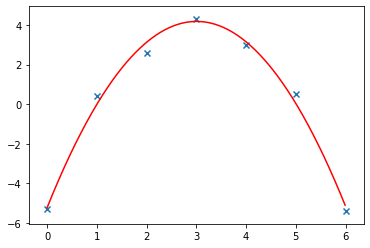

In [13]:
[a,b,c]=parabole(xB,yB)
n=len(xB)
xx =np.arange(xB[0],xB[n-1],0.01)
plt.plot(xx,a*xx**2+b*xx+c,'r')
plt.scatter(xB,yB,marker='x')
plt.show()

2. Problèmes de moindres carrés non linéaires
----------------------------------------------

On considère un circuit RLC série en régime permanent (c'est-à-dire quand l'équilibre s'est installé) et en oscillations forcées (c'est-à-dire qu'on impose à ses bornes une tension sinusoidale).

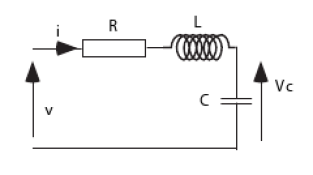

On sait alors (grâce à la physique et en résolvant une équation différentielle linéaire du second ordre à coefficients constants) que la tension aux bornes du condensateur est de la forme:
$$
U(t)=U_{max} \cos(\omega t+\phi)
$$
où $U_{max}$, $\omega$ et $\phi$ sont fonction des caractéristiques du circuit (résistance, inductance, condensateur, tension imposée). 

On mesure expérimentalement la tension aux bornes du condensateur. On note $U_n$ la tension mesurée à l'instant $t_n$ pour $n$ variant de $1$ à $N$. 

In [14]:
#Generation des données
data=scipy.io.loadmat('data.mat')
t=data['t']
t = t[:,0]
#t=tU[:,0]
U=data['U']
U = U[:,0]
N=len(t)

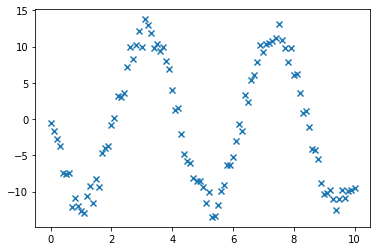

In [15]:
#Affichage des points de mesure
plt.scatter(t, U,marker='x')
plt.show()

A partir de ces $N$ mesures, on souhaite connaître les caractéristiques du circuit RLC, donc les grandeurs $U_{max}$, $\omega$ et $\phi$. On va donc chercher les valeurs de $U_{max}$, $\omega$ et $\phi$ tels que $U(t_n)$ soit le plus proche possible de $U_n$ pour tout $n$.

Q1. Expliquer pourquoi le problème décrit ci-dessus se traduit mathématiquement par
$$min\left\{ r(x_1,x_2,x_3)= \frac{1}{2} \sum_{n=1}^N \left( x_1 \cos(x_2 t_n+ x_3) - U_n\right)^2 \, , \, (x_1,x_2,x_3)\in \mathbb{R}^3 \right\}$$

Q2. Traduire ce problème de minimisation en un problème du type:
$$min\left\{r(x_1,x_2,x_3)= \frac{1}{2}\|g(x)\|_2^2\right\}.$$
Calculer explicitement la fonction $g$ et sa matrice jacobienne. L'implémenter.

In [16]:
def fct_g(x,t,U):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    g = x1*np.cos(x2*t+x3)-U
    Jg = np.transpose(np.array([np.cos(x2*t+x3), -x1*t*np.sin(x2*t+x3), -x1*np.sin(x2*t+x3)]))
    return g,Jg

In [17]:
g,Jg= fct_g(np.array([0,0,0]),t,U)
A=np.transpose(Jg).dot(Jg)
print(A)
print(g.shape, Jg.shape)

[[101.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]
(101,) (101, 3)


Q3. Ecrire l'algorithme de Gauss-Newton pour résoudre le problème posé à la question précédente.

In [18]:
def GaussNewton(function,x0,epsilon):
    x = np.copy(x0)
    y=[x]
    eps = 1e-6
    itermax = 1000
    err = 2*eps
    iter = 0
    while err>eps and iter<itermax:  
        # Modèle p.40 du poly d'opti
        x = y[iter]
        # produit Jf.Jf
        F,Jf = function(x, t, U)
        Jft = np.transpose(Jf)
        JftJf = np.dot(Jft, Jf) 
        # produit -Jft•F
        JftF = np.dot(-Jft, F)
        # on trouve d
        d = np.linalg.solve(JftJf, JftF)
        # on trouve le nouveau x 
        y = y + [x+d]
        err = np.linalg.norm(d)
        iter += 1
    xiter=np.array(y)
    return x,xiter,iter

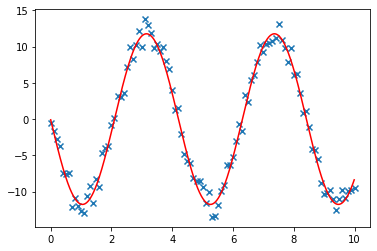

a : convergence vers  [-11.76992568  -1.49225336  14.129144  ]  nb iterations :  9


In [19]:
# Tester plusieurs points initiaux
x0 = np.array([1,1,1])
#x0 = np.zeros(3)

epsilon=0.0001
x,xiter,iter=GaussNewton(fct_g,x0,epsilon)
Umax=x[0]
omega=x[1]
phi = x[2]
plt.scatter(t, U,marker='x')
tt=np.arange(0,10,0.01)
plt.plot(tt,Umax*np.cos(omega*tt+phi),color='red')
plt.show()
print ("a : convergence vers ",x," nb iterations : ",iter)

Expliquer pourquoi, pour $x_0=(0,0,0)$ par exemple, l'algorithme ne renvoie pas le résultat attendu. A quelle propriété de l'algorithme de Gauss-Newton, cela correspond-il ?